In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='whitegrid')

# Load Data

In [2]:
path="/Users/serenazhang/Desktop/personalization project/project/{0}.csv"
df=pd.read_csv(path.format("train"))
mem=pd.read_csv(path.format("members"))
df_song=pd.read_csv(path.format("songs"))
df_song_ex=pd.read_csv(path.format("song_extra_info"))
df=df.fillna("unknown")
mem=mem.fillna("unknown")
df_song=df_song.fillna("unknown")

In [3]:
df_all=df.merge(df_song,on="song_id",how="left")
df_all=df_all.merge(mem,on="msno",how="left")

In [4]:
target = df_all['target']
df_all.drop(labels=['target'], axis=1,inplace = True)
df_all.insert(0, 'ztarget', target)

In [5]:
df_all.head(2)

,ztarget,msno,song_id,source_system_tab,source_screen_name,source_type,song_length,genre_ids,artist_name,composer,lyricist,language,city,bd,gender,registered_via,registration_init_time,expiration_date
0,1,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,206471.0,359,Bastille,Dan Smith| Mark Crew,unknown,52,1,0,unknown,7,20120102,20171005
1,1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,284584.0,1259,Various Artists,unknown,unknown,52,13,24,female,9,20110525,20170911


In [6]:
df_song_ex.head()

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001


# Basic Stats

In [7]:
num_of_items=df.song_id.nunique()
num_of_users=df.msno.nunique()
num_liked=df.loc[df["target"]==1].shape[0]
print("# of users:",num_of_users)
print("# of items:",num_of_items)
print("# of likes:",num_liked)
print("# of rows:", df.shape[0])

# of users: 30755
# of items: 359966
# of likes: 3714656
# of rows: 7377418


code start problem serious. density is very low. It means, only 0.07% of the dataset is filled, but with those rated, approximately half of the target is positive. 

In [8]:
df.shape[0]/(num_of_items*num_of_users)

0.0006663880147722509

### The Train Data Set - User-Item Interaction

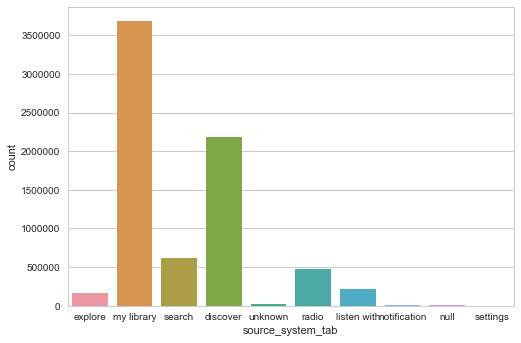

In [9]:
ax = sns.countplot(x="source_system_tab", data=df)

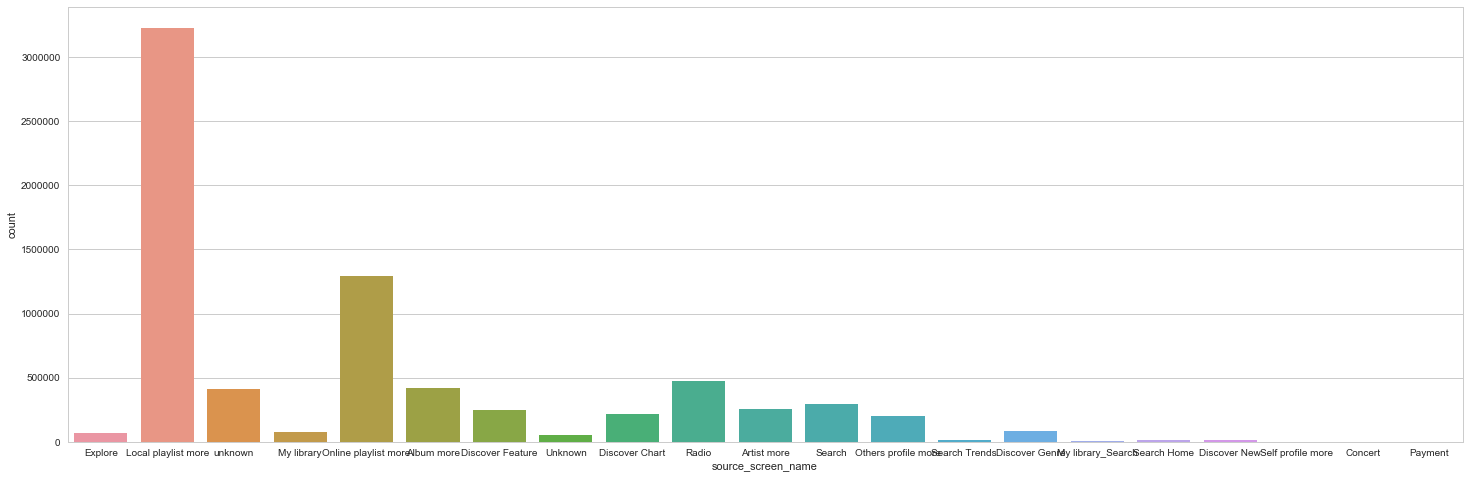

In [10]:
fig, ax = plt.subplots(figsize=(25,8))
ax = sns.countplot(ax=ax,x="source_screen_name", data=df,)

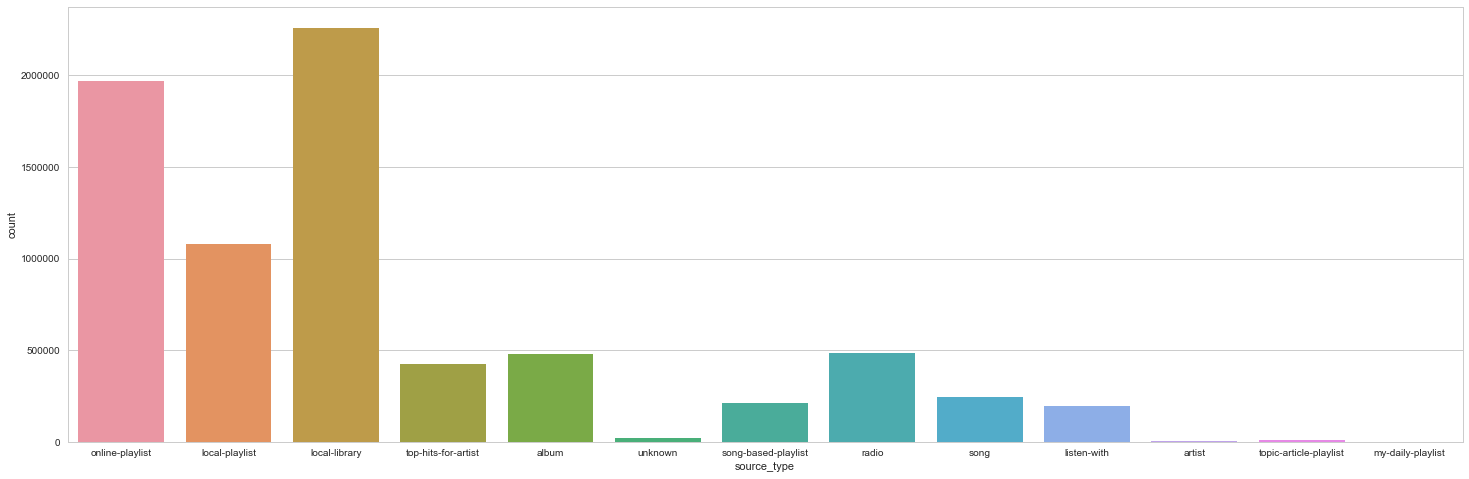

In [11]:
fig, ax = plt.subplots(figsize=(25,8))
ax = sns.countplot(ax=ax,x="source_type", data=df)

### Member Information [gender, bd,registered_via,city]

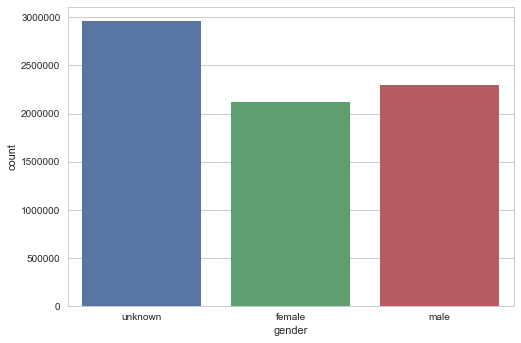

In [12]:
ax = sns.countplot(x="gender", data=df_all)

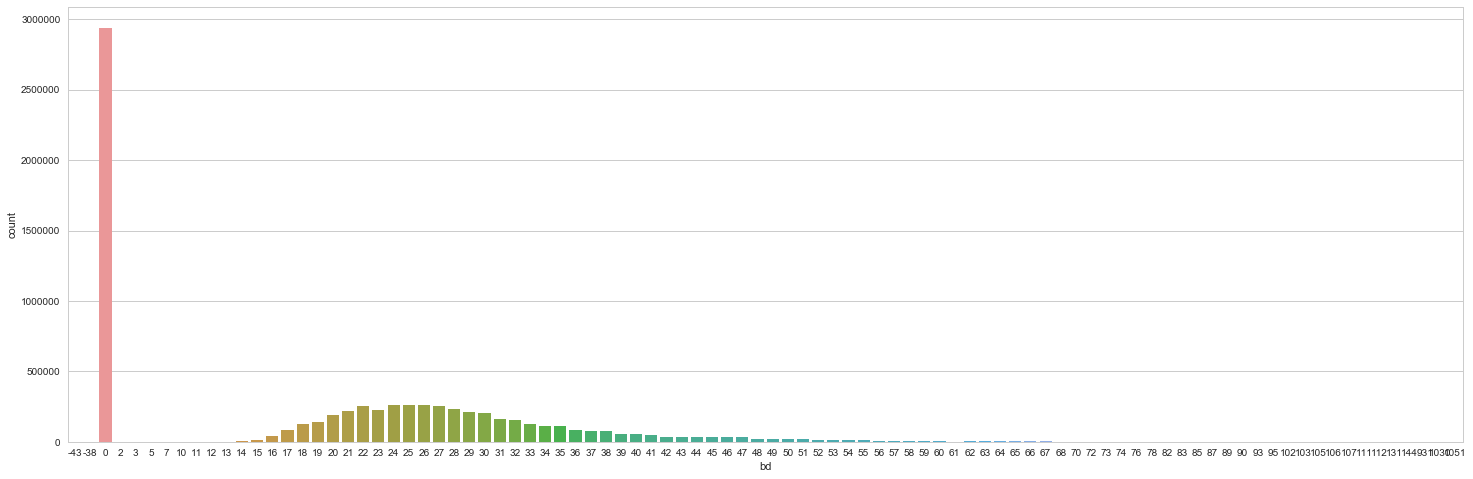

In [13]:
fig, ax = plt.subplots(figsize=(25,8))
ax = sns.countplot(x="bd", data=df_all)

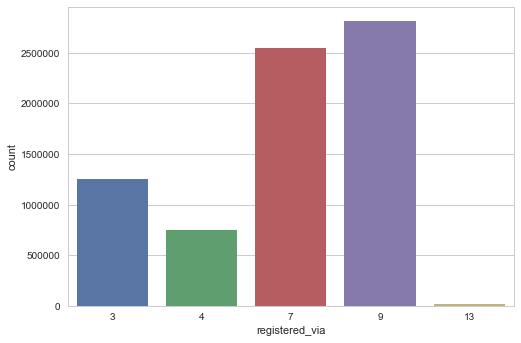

In [14]:
ax = sns.countplot(x="registered_via", data=df_all)

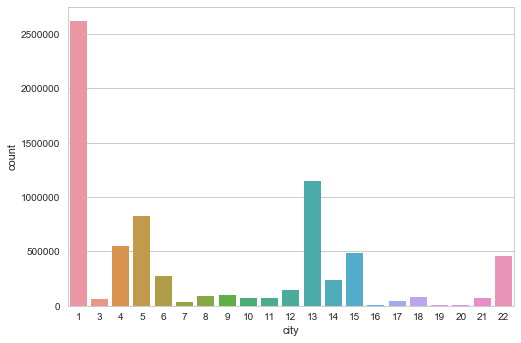

In [15]:
ax = sns.countplot(x="city", data=df_all)

###  Song Information [song_id, song_length, genre_ids, artist_name,language)

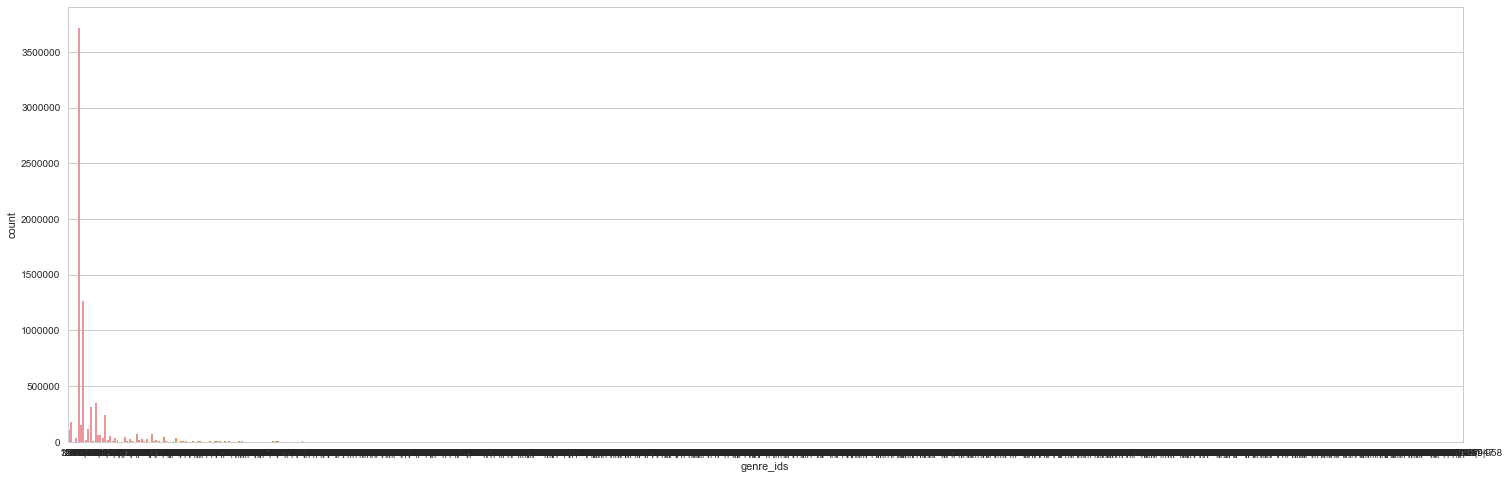

In [24]:
fig, ax = plt.subplots(figsize=(25,8))
ax = sns.countplot(x="genre_ids", data=df_all)

In [16]:
df_all.genre_ids.nunique()

573

In [17]:
genre_count=df_all.genre_ids.value_counts().reset_index().rename(
    columns={'index': 'genre', "genre_ids": 'count'})

In [36]:
(genre_count[:50]["count"]).sum()/genre_count["count"].sum()

0.9872419518024471

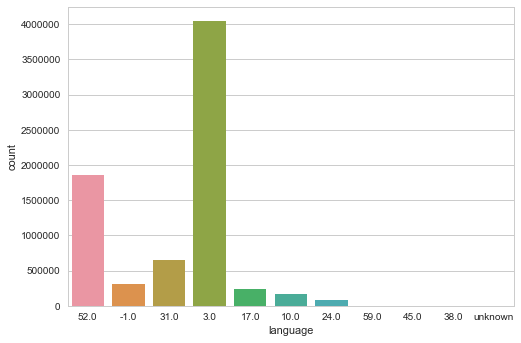

In [24]:
ax = sns.countplot(x="language", data=df_all)

In [25]:
df_all.artist_name.nunique()

40582

In [26]:
artist_count=df_all.artist_name.value_counts().reset_index().rename(
    columns={'index': 'artist_name', "artist_name": 'count'})

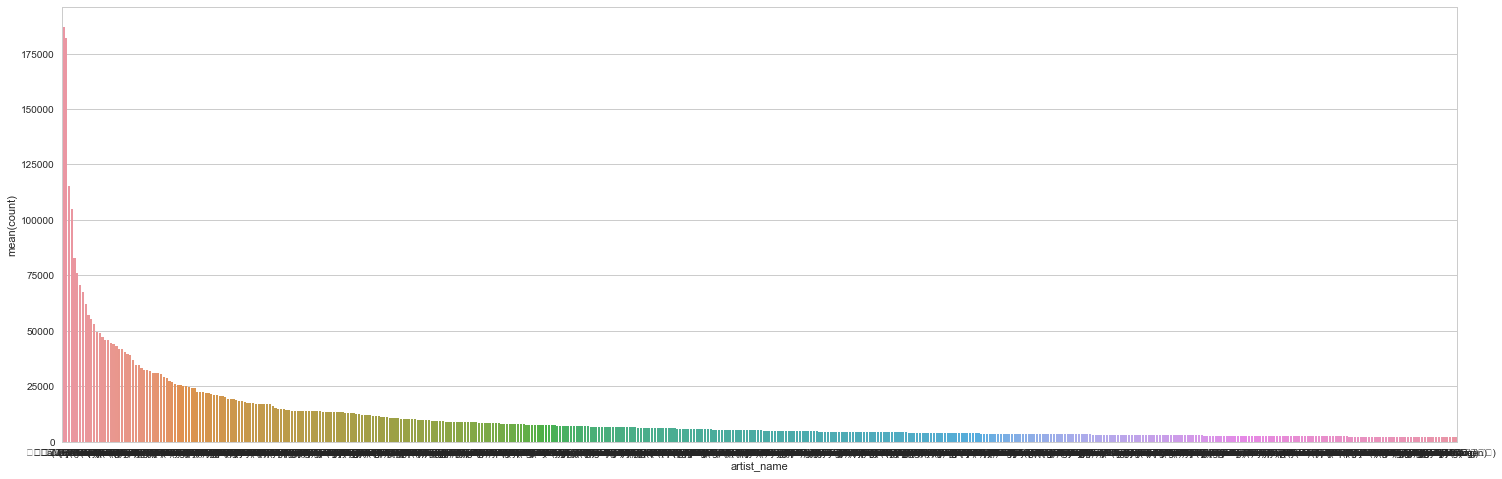

In [27]:
fig, ax = plt.subplots(figsize=(25,8))
ax = sns.barplot(x="artist_name",y="count", data=artist_count[:501].loc[artist_count["artist_name"]!="Various Artists"])

In [28]:
(artist_count[:500]["count"]).sum()/artist_count["count"].sum()

0.7476910264237451

# Data Preparation

<br />
The features I intent to explore are:
- msno
- song_id
- source_system_tab
- source_screen_name
- source_type
- song_length
- genre_ids
- artist_name
- language
- city
- registrered_via
<br />

In [29]:
#convert the following to categorical data
df_all['artist_name']= df_all['artist_name'].astype(str)
df_all['genre_ids']= df_all['genre_ids'].astype(str)
df_all['city']= df_all['city'].astype(str)
df_all['language']= df_all['language'].astype(str)
df_all['registered_via']= df_all['registered_via'].astype(str)

In [30]:
df_all.drop(['composer',"lyricist","bd","gender","registration_init_time","expiration_date"], axis=1,inplace = True)

In [31]:
artist_set=artist_count[:500].artist_name.unique().tolist()

In [37]:
genre_set=genre_count[:50].genre.unique().tolist()

In [38]:
df_all.loc[~df_all['artist_name'].isin(artist_set),"artist_name"]="unknown"

In [39]:
df_all.loc[~df_all['genre_ids'].isin(genre_set),"genre_ids"]="unknown"

In [ ]:
# store cleaned dataset to pickle file

In [41]:
df_all.to_pickle('/Users/serenazhang/Desktop/personalization project/project/Part II/df_all')

### How train and test related

In [27]:
#df_t=pd.read_csv(path.format("test"))
#matched=df.merge(df_t, on=['msno',"song_id"], how='inner')
#matched.loc[matched.target==0].shape[0]

In [16]:
num_of_items=df_t.song_id.nunique()
num_of_users=df_t.msno.nunique()
print("# of users:",num_of_users)
print("# of items:",num_of_items)
print("# of rows:", df_t.shape[0])

# of users: 25131
# of items: 224753
# of rows: 2556790


In [ ]:
Further feature exploration:
mem["duration"]=mem.expiration_date-mem.registration_init_time